This notebook contains some functions to run a list of commands and parse the ouput of `time`-ing it.
It requires Jupyter, matplotlib and LaTeX (if you wanna export the resulting plot).

In [1]:
import subprocess

In [2]:
def ssv_to_dict(ssv):
    """
    Convert a 2-column space-separated table into a dict.
    """
    data = dict()
    for line in ssv.splitlines():
        parts = line.split(" ")
        if len(parts) == 2:
            data[parts[0]] = parts[1]
    return data

def time_command(command):
    """
    Run the given command, time it using `time` and return the results as a dictionary of floats.
    """
    
    proc = subprocess.run([
        "bash", "-c",
        "time -p {}".format(command)
    ], capture_output=True)
    
    raw_dict = ssv_to_dict(proc.stderr.decode("utf-8"))
    
    return {
        key: float(value.replace(",", ".")) for key, value in raw_dict.items()
    }

In [3]:
# time_command("mpirun --host localhost:4 ./hello")

In [4]:
def time_tasks(tasks):
    results = []
    for label, command in tasks:
        print("Timing task '{}'".format(label))
        times = time_command(command)
        print("  Result: {}".format(times))
        results.append((label, times))
    return results

In [19]:
tasks = []
for n_cores in [1,2,4,8,16,32,64,128]:
    tasks.append((
        "{}".format(n_cores),
        "mpirun --host localhost:{} ./hello".format(n_cores)
    ))

results = time_tasks(tasks)

Timing task '1'
  Result: {'real': 13.37, 'user': 13.03, 'sys': 0.12}
Timing task '2'
  Result: {'real': 6.98, 'user': 13.1, 'sys': 0.17}
Timing task '4'
  Result: {'real': 4.13, 'user': 13.32, 'sys': 0.26}
Timing task '8'
  Result: {'real': 4.16, 'user': 13.35, 'sys': 0.54}
Timing task '16'
  Result: {'real': 4.28, 'user': 13.5, 'sys': 0.96}
Timing task '32'
  Result: {'real': 4.74, 'user': 13.6, 'sys': 2.18}
Timing task '64'
  Result: {'real': 6.02, 'user': 14.37, 'sys': 4.67}
Timing task '128'
  Result: {'real': 8.75, 'user': 16.51, 'sys': 11.4}


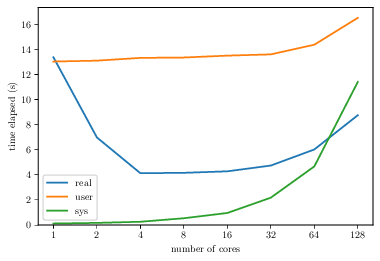

In [20]:
# import matplotlib
import matplotlib.pyplot as plt

labels = [r[0] for r in results]
reals = [r[1]['real'] for r in results]
users = [r[1]['user'] for r in results]
syss = [r[1]['sys'] for r in results]

plt.plot(labels, reals)
plt.plot(labels, users)
plt.plot(labels, syss)
plt.xlabel('number of cores')
plt.ylabel('time elapsed (s)')
plt.ylim(bottom=0)
plt.legend(['real', 'user', 'sys'])

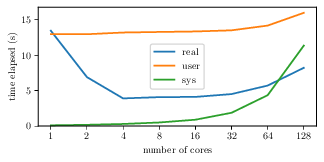

In [18]:
import matplotlib
import matplotlib.pyplot as plt

# https://timodenk.com/blog/exporting-matplotlib-plots-to-latex/
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': "serif",
    'text.usetex': True,
    'pgf.rcfonts': False,
})

labels = [r[0] for r in results]
reals = [r[1]['real'] for r in results]
users = [r[1]['user'] for r in results]
syss = [r[1]['sys'] for r in results]

fig, ax = plt.subplots()

ax.plot(labels, reals)
ax.plot(labels, users)
ax.plot(labels, syss)
ax.set_xlabel('number of cores')
ax.set_ylabel('time elapsed (s)')
ax.set_ylim(bottom=0)
ax.legend(['real', 'user', 'sys'])

# About right for mtheme beamer slides
fig.tight_layout()
fig.set_size_inches(w=4.4, h=2)
fig.savefig('perf.pgf')